This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You will predict the type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.

This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will be the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
    4.  For a given K, filter the dataset to extract the most popular K Primary Types and report what percentage of the total dataset this amounts to. Lets call this percentage, F. Now, find what fraction of this filtered data can be supported in your analysis on your local machine. Lets call this P. For example, of the approximately 7 million entries, say for K=3, we find that the top three types of crime add up to around 3.5 million, which makes F be 50%. Now see if your machine can handle all 3.5 million entries in you ML analysis. Say you find out that you can only handle 60% of this, which means your working dataset will be 2.1 million entries.  
5.  For each K=2,3,4,5 (and associated percentage 'P'), you should train a model and report the accuracy. (Refer to other tasks)

Hint: Split the data into training and testing in the ratio of 80:20.

In [2]:
cmpt0 = time.process_time()
df = pd.read_csv('Crimes_-_2001_to_Present (1).csv')
cmpt1 = time.process_time()
total = cmpt1-cmpt0
print("Time to run on Local Machine= "+str(total) +" s")
df.drop(['X Coordinate', 'Y Coordinate','Latitude', 'Longitude', 'Location'], axis=1)

Time to run on Local Machine= 20.46875 s


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,2001,08/05/2017 03:50:08 PM
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,2017,02/11/2018 03:57:41 PM
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,05,2017,02/11/2018 03:57:41 PM
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,2017,02/11/2018 03:57:41 PM
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,2017,02/11/2018 03:57:41 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202515,11700926,JC279725,05/26/2019 05:13:00 PM,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,1011,10.0,24.0,29.0,26,2019,06/30/2019 03:56:27 PM
7202516,24560,JC279072,05/26/2019 06:48:00 AM,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,1233,12.0,25.0,28.0,01A,2019,06/20/2020 03:48:45 PM
7202517,11707734,JC287730,07/01/2014 07:30:00 AM,063XX S NORMAL BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,722,7.0,20.0,68.0,11,2014,06/02/2019 04:09:42 PM
7202518,11707239,JC287563,11/30/2017 09:00:00 AM,022XX S KOSTNER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1013,10.0,22.0,29.0,11,2017,06/02/2019 04:09:42 PM


In [2]:
awst0 = time.process_time()
df = pd.read_csv('Crimes_-_2001_to_Present (1).csv')
awst1 = time.process_time()
total = awst1-awst0
print("Time to run on AWS= "+str(total) +" s")
df.drop(['X Coordinate', 'Y Coordinate','Latitude', 'Longitude', 'Location'], axis=1)

Time to run on AWS= 51.127321376 s


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,2001,08/05/2017 03:50:08 PM
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,2017,02/11/2018 03:57:41 PM
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,05,2017,02/11/2018 03:57:41 PM
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,2017,02/11/2018 03:57:41 PM
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,2017,02/11/2018 03:57:41 PM
5,11227503,JB146383,01/01/2015 12:01:00 AM,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,813,8.0,13.0,65.0,17,2015,04/12/2019 04:00:15 PM
6,11227508,JB146365,01/01/2017 12:01:00 AM,027XX S WHIPPLE ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,1033,10.0,12.0,30.0,02,2017,02/11/2018 03:57:41 PM
7,11022695,JA353568,07/17/2017 10:10:00 AM,021XX W MC LEAN AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,1432,14.0,32.0,22.0,06,2017,07/24/2017 03:54:23 PM
8,11227633,JB147500,12/28/2017 03:55:00 PM,011XX S MICHIGAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,123,1.0,2.0,32.0,11,2017,02/11/2018 03:57:41 PM
9,11227586,JB147613,02/10/2017 12:00:00 PM,089XX S COTTAGE GROVE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,633,6.0,8.0,44.0,14,2017,02/11/2018 03:57:41 PM


## Part 1 and 2

In [3]:
df['Primary Type'].value_counts().sort_values(ascending=False)

THEFT                                1520730
BATTERY                              1319425
CRIMINAL DAMAGE                       820333
NARCOTICS                             733573
ASSAULT                               455410
OTHER OFFENSE                         447026
BURGLARY                              405991
MOTOR VEHICLE THEFT                   331466
DECEPTIVE PRACTICE                    296758
ROBBERY                               270577
CRIMINAL TRESPASS                     204287
WEAPONS VIOLATION                      83647
PROSTITUTION                           69358
PUBLIC PEACE VIOLATION                 50590
OFFENSE INVOLVING CHILDREN             49825
CRIM SEXUAL ASSAULT                    28189
SEX OFFENSE                            27464
INTERFERENCE WITH PUBLIC OFFICER       17367
GAMBLING                               14590
LIQUOR LAW VIOLATION                   14434
ARSON                                  12000
HOMICIDE                               10625
KIDNAPPING

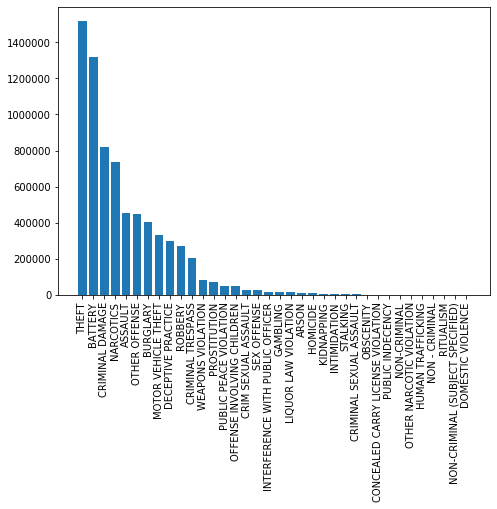

In [4]:
x=df['Primary Type'].value_counts().index.to_list()
y=df['Primary Type'].value_counts().to_list()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.xticks(rotation='vertical')
plt.show()

## For Part 3 and 4-Please Refer to Task 2 and Task 3

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [3]:
data = df.copy()
data = data[['IUCR', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Year', 'Community Area', 'Primary Type']]
#data = data[['IUCR', 'Location Description', 'Arrest', 'Domestic', 'Primary Type']]
data.dropna(inplace=True)
data

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Community Area,Primary Type
0,1153,RESIDENCE,False,False,412,4.0,8.0,2001,45.0,DECEPTIVE PRACTICE
1,0281,RESIDENCE,False,False,2222,22.0,21.0,2017,73.0,CRIM SEXUAL ASSAULT
2,0620,OTHER,False,False,835,8.0,18.0,2017,70.0,BURGLARY
3,0810,RESIDENCE,False,False,313,3.0,20.0,2017,42.0,THEFT
4,0281,HOTEL/MOTEL,False,False,122,1.0,42.0,2017,32.0,CRIM SEXUAL ASSAULT
5,1751,RESIDENCE,False,True,813,8.0,13.0,2015,65.0,OFFENSE INVOLVING CHILDREN
6,1754,RESIDENCE,False,False,1033,10.0,12.0,2017,30.0,OFFENSE INVOLVING CHILDREN
7,0810,RESIDENCE,False,False,1432,14.0,32.0,2017,22.0,THEFT
9,1310,APARTMENT,False,False,633,6.0,8.0,2017,44.0,CRIMINAL DAMAGE
10,2826,APARTMENT,False,True,1711,17.0,39.0,2017,13.0,OTHER OFFENSE


In [4]:
iucr_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(data['IUCR']))}
ld_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(data['Location Description']))}
arrest_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(data['Arrest']))}
domestic_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(data['Domestic']))}
pt_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(data['Primary Type']))}

In [5]:
data['IUCR'] = data['IUCR'].map(iucr_mapping)
data['Location Description'] = data['Location Description'].map(ld_mapping)
data['Arrest'] = data['Arrest'].map(arrest_mapping)
data['Domestic'] = data['Domestic'].map(domestic_mapping)
data['Primary Type'] = data['Primary Type'].map(pt_mapping)
data

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Community Area,Primary Type
0,134,158,0,0,412,4.0,8.0,2001,45.0,9
1,14,158,0,0,2222,22.0,21.0,2017,73.0,5
2,87,139,0,0,835,8.0,18.0,2017,70.0,3
3,90,158,0,0,313,3.0,20.0,2017,42.0,33
4,14,114,0,0,122,1.0,42.0,2017,32.0,5
5,249,158,0,1,813,8.0,13.0,2015,65.0,23
6,252,158,0,0,1033,10.0,12.0,2017,30.0,23
7,90,158,0,0,1432,14.0,32.0,2017,22.0,33
9,158,17,0,0,633,6.0,8.0,2017,44.0,6
10,315,17,0,1,1711,17.0,39.0,2017,13.0,25


## Setting up K=2,3,4,5

In [8]:
first = data['Primary Type'].value_counts().index[0]
second = data['Primary Type'].value_counts().index[1]
third = data['Primary Type'].value_counts().index[2]
fourth = data['Primary Type'].value_counts().index[3]
fifth = data['Primary Type'].value_counts().index[4]

### K=2

In [9]:
k2 = data.copy()
k2 = k2[(k2['Primary Type'] == first) | (k2['Primary Type'] ==second)]
print('Percentage of data for K=2: F=' + str(len(k2)/len(data) * 100) + '%.')

Percentage of data for K=2: F=39.48452157227776%.


### K=3

In [10]:
k3 = data.copy()
k3 = k3[(k3['Primary Type'] == first) | (k3['Primary Type'] ==second)| (k3['Primary Type'] ==third)]
print('Percentage of data for K=3: F=' + str(len(k3)/len(data) * 100) + '%.')

Percentage of data for K=3: F=50.86293062933305%.


### K=4

In [11]:
k4 = data.copy()
k4 = k4[(k4['Primary Type'] == first) | (k4['Primary Type'] ==second)| (k4['Primary Type'] ==third)| (k4['Primary Type'] ==fourth)]
print('Percentage of data for K=4: F=' + str(len(k4)/len(data) * 100) + '%.')

Percentage of data for K=4: F=60.98834003233273%.


### K=5

In [12]:
k5 = data.copy()
k5 = k5[(k5['Primary Type'] == first) | (k5['Primary Type'] ==second)| (k5['Primary Type'] ==third)| (k5['Primary Type'] ==fourth)| (k5['Primary Type'] ==fifth)]
print('Percentage of data for K=5: F=' + str(len(k5)/len(data) * 100) + '%.')

Percentage of data for K=5: F=67.30370999523947%.


# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [15]:
t0 = time.process_time()

X = data.iloc[ : , :9].values
y = data['Primary Type'].values
# Splitting the data between a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
total = t1-t0
print("Time to run on Local Machine = "+str(total) +" s")

Time to run on Local Machine = 1.8125 s


In [16]:
t0 = time.process_time()
# Here goes the Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1,solver='lbfgs'))])
pipe_lr.fit(X_train, y_train)
t1 = time.process_time()
total = t1-t0
print("Time to run on Local Machine = "+str(total) +" s")

Time to run on Local Machine = 1061.0 s


In [17]:
t0 = time.process_time()

# Use the LR model to predict the test data
y_pred = pipe_lr.predict(X_test)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Precision: %.2f' % precision_score(y_test,y_pred, average='weighted'))
print('Recall: %.2f' % recall_score(y_test,y_pred, average='weighted'))
print('F1: %.2f' % f1_score(y_test,y_pred, average='weighted'))
t1 = time.process_time()
total = t1-t0
print("Time to run on Local Machine= "+str(total) +" s")

Misclassified samples: 207404
Accuracy: 0.84
Precision: 0.83
Recall: 0.84
F1: 0.82
Time to run on Local Machine= 2.734375 s


## Modeling K=2,3,4,5

### K=2

In [18]:
t0 = time.process_time()

X = k2.iloc[ : , :9].values
y = k2['Primary Type'].values
# Splitting the data between a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
total = t1-t0
print("Time to run splitting data for K=2 = "+str(total) +" s")

t0 = time.process_time()
# Here goes the Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1,solver='lbfgs'))])

pipe_lr.fit(X_train, y_train)

t1 = time.process_time()
total = t1-t0
print("Time to run modeling for K=2 = "+str(total) +" s")

t0 = time.process_time()

# Use the LR model to predict the test data
y_pred = pipe_lr.predict(X_test)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Precision: %.2f' % precision_score(y_test,y_pred, average='weighted'))
print('Recall: %.2f' % recall_score(y_test,y_pred, average='weighted'))
print('F1: %.2f' % f1_score(y_test,y_pred, average='weighted'))
print('P is 100%')
t1 = time.process_time()
total = t1-t0
print("Time to run prediction for K=2 = "+str(total) +" s")

Time to run splitting data for K=2 = 0.953125 s
Time to run modeling for K=2 = 18.546875 s
Misclassified samples: 0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
P is 100%
Time to run prediction for K=2 = 1.390625 s


### K=3

In [19]:
t0 = time.process_time()

X = k3.iloc[ : , :9].values
y = k3['Primary Type'].values
# Splitting the data between a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
total = t1-t0
print("Time to run splitting data for K=3 = "+str(total) +" s")

t0 = time.process_time()
# Here goes the Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1,solver='lbfgs'))])

pipe_lr.fit(X_train, y_train)

t1 = time.process_time()
total = t1-t0
print("Time to run modeling for K=3 = "+str(total) +" s")

t0 = time.process_time()

# Use the LR model to predict the test data
y_pred = pipe_lr.predict(X_test)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Precision: %.2f' % precision_score(y_test,y_pred, average='weighted'))
print('Recall: %.2f' % recall_score(y_test,y_pred, average='weighted'))
print('F1: %.2f' % f1_score(y_test,y_pred, average='weighted'))
print('P is 100%')
t1 = time.process_time()
total = t1-t0
print("Time to run prediction for K=3 = "+str(total) +" s")

Time to run splitting data for K=3 = 1.109375 s
Time to run modeling for K=3 = 62.53125 s
Misclassified samples: 0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
P is 100%
Time to run prediction for K=3 = 1.40625 s


### K4

In [20]:
t0 = time.process_time()

X = k4.iloc[ : , :9].values
y = k4['Primary Type'].values
# Splitting the data between a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
total = t1-t0
print("Time to run splitting data for K=4 = "+str(total) +" s")

t0 = time.process_time()
# Here goes the Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1,solver='lbfgs'))])

pipe_lr.fit(X_train, y_train)

t1 = time.process_time()
total = t1-t0
print("Time to run modeling for K=4 = "+str(total) +" s")

t0 = time.process_time()

# Use the LR model to predict the test data
y_pred = pipe_lr.predict(X_test)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Precision: %.2f' % precision_score(y_test,y_pred, average='weighted'))
print('Recall: %.2f' % recall_score(y_test,y_pred, average='weighted'))
print('F1: %.2f' % f1_score(y_test,y_pred, average='weighted'))
print('P is 100%')
t1 = time.process_time()
total = t1-t0
print("Time to run prediction for K=4 = "+str(total) +" s")

Time to run splitting data for K=4 = 1.359375 s
Time to run modeling for K=4 = 157.328125 s
Misclassified samples: 0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
P is 100%
Time to run prediction for K=4 = 1.625 s


### K=5

In [21]:
t0 = time.process_time()

X = k5.iloc[ : , :9].values
y = k5['Primary Type'].values
# Splitting the data between a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
total = t1-t0
print("Time to run splitting data for K=5 = "+str(total) +" s")

t0 = time.process_time()
# Here goes the Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1,solver='lbfgs'))])

pipe_lr.fit(X_train, y_train)

t1 = time.process_time()
total = t1-t0
print("Time to run modeling for K=5 = "+str(total) +" s")

t0 = time.process_time()

# Use the LR model to predict the test data
y_pred = pipe_lr.predict(X_test)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Precision: %.2f' % precision_score(y_test,y_pred, average='weighted'))
print('Recall: %.2f' % recall_score(y_test,y_pred, average='weighted'))
print('F1: %.2f' % f1_score(y_test,y_pred, average='weighted'))
print('P is 100%')
t1 = time.process_time()
total = t1-t0
print("Time to run prediction for K=5 = "+str(total) +" s")

Time to run splitting data for K=5 = 1.53125 s
Time to run modeling for K=5 = 224.078125 s
Misclassified samples: 179
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
P is 100%
Time to run prediction for K=5 = 1.828125 s


# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

In [6]:
t0 = time.process_time()

X = data.iloc[ : , :9].values
y = data['Primary Type'].values
# Splitting the data between a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

t1 = time.process_time()
total = t1-t0
print("Time to run on AWS = "+str(total) +" s")

Time to run on AWS = 2.785358811000009 s


In [7]:
t0 = time.process_time()
# Here goes the Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1,solver='lbfgs'))])
pipe_lr.fit(X_train, y_train)

t1 = time.process_time()
total = t1-t0
print("Time to run on AWS = "+str(total) +" s")

Time to run on AWS = 696.1566546939999 s


In [8]:
t0 = time.process_time()

# Use the LR model to predict the test data
y_pred = pipe_lr.predict(X_test)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Precision: %.2f' % precision_score(y_test,y_pred, average='weighted'))
print('Recall: %.2f' % recall_score(y_test,y_pred, average='weighted'))
print('F1: %.2f' % f1_score(y_test,y_pred, average='weighted'))
t1 = time.process_time()
total = t1-t0
print("Time to run on AWS = "+str(total) +" s")

Misclassified samples: 523196
Accuracy: 0.60
Precision: 0.53
Recall: 0.60
F1: 0.52
Time to run on AWS = 2.0403650609999886 s


# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

In [22]:
cmpt0 = time.process_time()
# Create a Stratified K-Fold; 
kfold = StratifiedKFold(n_splits=5,
                            random_state=None).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    #print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          #np.bincount(y_train[train]), score))
cmpt1 = time.process_time()
total = cmpt1 - cmpt0
print("Time to run on Local Machine = "+str(total) +" s")
print('Scores for each fold:', scores)
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Time to run on Local Machine = 1003.140625 s
Scores for each fold: [0.999778397574512, 0.9998150960653572, 0.9997798090549291, 0.9997628709552208, 0.9997459331663079]

CV accuracy: 1.000 +/- 0.000


In [9]:
awst0 = time.process_time()
# Create a Stratified K-Fold; 
kfold = StratifiedKFold(n_splits=5,
                            random_state=None).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    #print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          #np.bincount(y_train[train]), score))
awst1 = time.process_time()
total = awst1 - awst0
print("Time to run on AWS = "+str(total) +" s")
print('Scores for each fold:', scores)
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Time to run on AWS = 2842.564723475 s
Scores for each fold: [0.6017532576716897, 0.6021180648244113, 0.6024211184301774, 0.6020344863292513, 0.602091689292276]

CV accuracy: 0.602 +/- 0.000
